## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

#Display Dataset
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean = merged_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean().reset_index()
#print(regimen_mean)

regimen_median = merged_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median().reset_index()
#print(regimen_median)

#regimen_varinace
regimen_var = merged_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var().reset_index()
#print(regimen_var)

#regimen_sd
regimen_std = merged_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std().reset_index()
#print(regimen_std)

regimen_sem = merged_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem().reset_index()
#print(regimen_sem)

#dataframe
stats_table = pd.merge(regimen_mean, regimen_median, on = "Drug Regimen")
stats_table1 = pd.merge(stats_table, regimen_var, on = "Drug Regimen")
stats_table2 = pd.merge(stats_table, regimen_std, on = "Drug Regimen")
stats_table3 = pd.merge(stats_table, regimen_sem, on = "Drug Regimen")
stats_table4 = stats_table3.rename(columns = {'Tumor Volume (mm3)_x': 'Tumor Volume Mean', 
                                'Tumor Volume (mm3)_y': 'Tumor Volume Median', 
                                'Tumor Volume (mm3)': 'Tumor Volume Variance',
                                'Tumor Volume (mm3)': 'Tumor Volume StDev',
                                'Tumor Volume (mm3)': 'Tumor Volume SEM'})
print(stats_table4)
#stats_table_df = pd.DataFrame(stats_table4,index=["Tumor Volume Mean", "Tumor Volume Median", 
#                                                  "Tumor Volume Variance","Tumor Volume StDev",
#                                                  "Tumor Volume SEM"],)
#print(stats_table_df)

  Drug Regimen  Tumor Volume Mean  Tumor Volume Median  Tumor Volume SEM
0    Capomulin          40.675741            41.557809          0.329346
1     Ceftamin          52.591172            51.776157          0.469821
2    Infubinol          52.884795            51.820584          0.492236
3     Ketapril          55.235638            53.698743          0.603860
4     Naftisol          54.331565            52.509285          0.596466
5      Placebo          54.033581            52.288934          0.581331
6     Propriva          52.322552            50.854632          0.512884
7     Ramicane          40.216745            40.673236          0.320955
8     Stelasyn          54.233149            52.431737          0.573111
9    Zoniferol          53.236507            51.818479          0.516398


## Bar plots

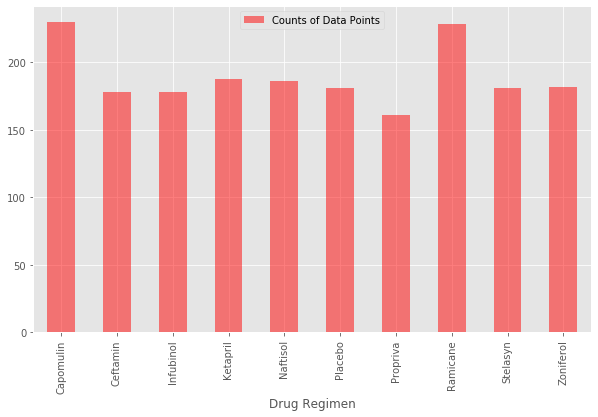

In [52]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#drug = merged_df['Drug Regimen'].unique()
#x_axis = np.arange(len(stats_table4))
Panda_Plot_DF = merged_df[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen']).count()
Panda_Plot_DF2 = Panda_Plot_DF.rename(columns={'Tumor Volume (mm3)':'Counts of Data Points'})
Panda_Plot_DF2.plot.bar(color='r', alpha=0.5, align='center')

       index  Drug Regimen
0  Capomulin           230
1   Ramicane           228
2   Ketapril           188
3   Naftisol           186
4  Zoniferol           182
5   Stelasyn           181
6    Placebo           181
7  Infubinol           178
8   Ceftamin           178
9   Propriva           161


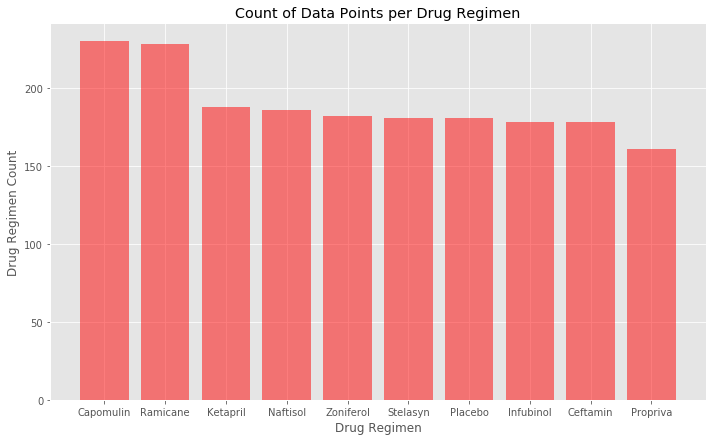

In [55]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = stats_table4.index.values
#tick_locations = [value for value in x_axis]
#print(x_axis)

number_of_dp = merged_df['Drug Regimen'].value_counts().reset_index()
#print(number_of_dp)

plt.bar(number_of_dp["index"], number_of_dp["Drug Regimen"] , color='r', alpha=0.5, align="center")# number of row value count, .index.values
#mergedf to count the number count per drug

#format
plt.xlabel("Drug Regimen")
plt.ylabel("Drug Regimen Count")
plt.tight_layout()
plt.title("Count of Data Points per Drug Regimen")
plt.style.use('ggplot')
#plt.xticks(x_axis, number_of_dp["Drug Regimen"], rotation="vertical")

## Pie plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000209F88CF978>],
      dtype=object)

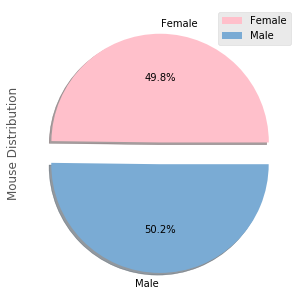

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_df = merged_df.copy()
pie_drop_df = pie_df.drop_duplicates(['Mouse ID'])
pie_grouped_df = pie_drop_df[['Mouse ID','Sex']].groupby(['Sex']).count()
pie_renamed_df = pie_grouped_df.rename(columns={'Mouse ID':'Mouse Distribution'})
colors = ["pink", "#7aabd4"]
pie_renamed_df.plot.pie(subplots=True,figsize =(10,5),autopct='%1.1f%%',fontsize=10,explode=[0,0.2],shadow=True,colors=colors)

C:\Users\NP182299\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


Text(0.5, 1.0, 'Gender Distribution')

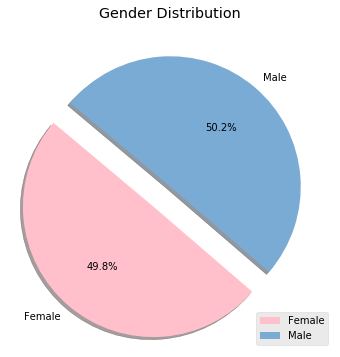

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = pie_grouped_df.index
explode = (0.2, 0)
plt.pie(pie_grouped_df, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.legend()
plt.title('Gender Distribution')

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.



In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin



In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

